In [1]:
%matplotlib nbagg

In [2]:
import pyximport
_ = pyximport.install()

Compare algorithms provided on the others notebook all together.

Marching square implementations
==================

In [3]:
from impl.MarchingSquareSciKitImage import MarchingSquareSciKitImage

In [4]:
from impl.MarchingSquareCythonArray import MarchingSquareCythonArray

In [5]:
from impl.MarchingSquareCythonArrayOpt import MarchingSquareCythonArrayOpt

In [6]:
from impl.MarchingSquareCythonMap import MarchingSquareCythonMap

In [7]:
from impl.MarchingSquareCythonInsert import MarchingSquareCythonInsert

In [8]:
from impl.MarchingSquareCythonInsertOpt import MarchingSquareCythonInsertOpt

In [9]:
from impl.MarchingSquareCythonInsertOpenMp import MarchingSquareCythonInsertOpenMp

In [10]:
from impl.MarchingSquareCythonInsertOpenMp98 import MarchingSquareCythonInsertOpenMp98

In [11]:
from impl.MarchingSquareCythonScanInsertOpenMp import MarchingSquareCythonScanInsertOpenMp

In [12]:
from impl.MarchingSquareCythonArrayOpenMp import MarchingSquareCythonArrayOpenMp

Utils
====

In [13]:
styles = {
    "MarchingSquareSciKitImage":
                            {"linestyle": "-", "color": "grey", "label": "skimage"},

    "MarchingSquareCythonMap":
                            {"linestyle": "-", "color": "red", "label": "map (c++11)"},
    "MarchingSquareCythonArray":
                            {"linestyle": ":", "color": "orange", "label": "array-basic"},
    "MarchingSquareCythonArrayOpt":
                            {"linestyle": "-", "color": "orange", "label": "array"},
    "MarchingSquareCythonArrayOpenMp":
                            {"linestyle": ":", "color": "gold", "label": "array+openmp (no poly merge)"},
    "MarchingSquareCythonArrayOpenMp+MinMax":
                            {"linestyle": "-", "color": "gold", "label": "array+openmp+minmap (no poly merge)"},

    "MarchingSquareCythonInsert":
                            {"linestyle": ":", "color": "green", "label": "insert-basic (c++11)"},
    "MarchingSquareCythonInsertOpt":
                            {"linestyle": "-", "color": "green", "label": "insert (c++11)"},
    "MarchingSquareCythonInsertOpenMp":
                            {"linestyle": "--", "color": "greenyellow", "label": "insert-openmp (c++11)"},
    "MarchingSquareCythonInsertOpenMp+MinMax":
                            {"linestyle": "-", "color": "greenyellow", "label": "insert-openmp+minmax (c++11)"},
    "MarchingSquareCythonInsertOpenMp+NoReverse":
                            {"linestyle": ":", "color": "olive", "label": "insert-openmp+noreverse (c++11)"},
    "MarchingSquareCythonInsertOpenMp+MinMax+NoReverse":
                            {"linestyle": ":", "color": "olive", "label": "insert-openmp+minmax+noreverse (c++11)"},
    "MarchingSquareCythonInsertOpenMp98":
                            {"linestyle": "--", "color": "aqua", "label": "insert-openmp (c++98)"},
    "MarchingSquareCythonInsertOpenMp98+MinMax":
                            {"linestyle": "-", "color": "aqua", "label": "insert-openmp+minmax (c++98)"},

    "MarchingSquareCythonScanInsertOpenMp":
                            {"linestyle": "--", "color": "blue", "label": "scaninsert-openmp (c++98)"},
    "MarchingSquareCythonScanInsertOpenMp+MinMax":
                            {"linestyle": "-", "color": "blue", "label": "insert-openmp+minmax (c++98)"},
}

In [14]:
try:
    import importlib
    importlib.reload(benchmark_utils)
except Exception as e:
    print(e)
import benchmark_utils

name 'benchmark_utils' is not defined


Benchmark
=====

This test is not very nice cause too much parameters changes

In [15]:
algorithms = [
    ("MarchingSquareSciKitImage", lambda i, m: MarchingSquareSciKitImage(i, m)),
    # ("MarchingSquareCythonArray", lambda i, m: MarchingSquareCythonArray(i, m)),
    ("MarchingSquareCythonArrayOpt", lambda i, m: MarchingSquareCythonArrayOpt(i, m)),
    ("MarchingSquareCythonMap", lambda i, m: MarchingSquareCythonMap(i, m)),
    # ("MarchingSquareCythonInsert", lambda i, m: MarchingSquareCythonInsert(i, m)),
    ("MarchingSquareCythonInsertOpt", lambda i, m: MarchingSquareCythonInsertOpt(i, m)),
    ("MarchingSquareCythonInsertOpenMp", lambda i, m: MarchingSquareCythonInsertOpenMp(i, m)),
    ("MarchingSquareCythonInsertOpenMp+MinMax", lambda i, m: MarchingSquareCythonInsertOpenMp(i, m, use_minmax_cache=True)),
    ("MarchingSquareCythonInsertOpenMp98", lambda i, m: MarchingSquareCythonInsertOpenMp98(i, m)),
    ("MarchingSquareCythonInsertOpenMp98+MinMax", lambda i, m: MarchingSquareCythonInsertOpenMp98(i, m, use_minmax_cache=True)),
    ("MarchingSquareCythonInsertOpenMp+MinMax+NoReverse", lambda i, m: MarchingSquareCythonInsertOpenMp(i, m, use_minmax_cache=True, use_reverse=False)),
    ("MarchingSquareCythonArrayOpenMp", lambda i, m: MarchingSquareCythonArrayOpenMp(i, m)),
    ("MarchingSquareCythonArrayOpenMp+MinMax", lambda i, m: MarchingSquareCythonArrayOpenMp(i, m, use_minmax_cache=True)),
    ("MarchingSquareCythonScanInsertOpenMp", lambda i, m: MarchingSquareCythonScanInsertOpenMp(i, m)),
    ("MarchingSquareCythonScanInsertOpenMp+MinMax", lambda i, m: MarchingSquareCythonScanInsertOpenMp(i, m, use_minmax_cache=True)),
]

Benchmark on image size
=======================

Provide problems with different size to benchmark influence of the image size on the algorithms.

This problems are generated from an original downscaled image, to try to have the same iso contour complexity.

This kind of gradiens are our main traget for pyFAI.

/home/valls/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<IPython.core.display.Javascript object>


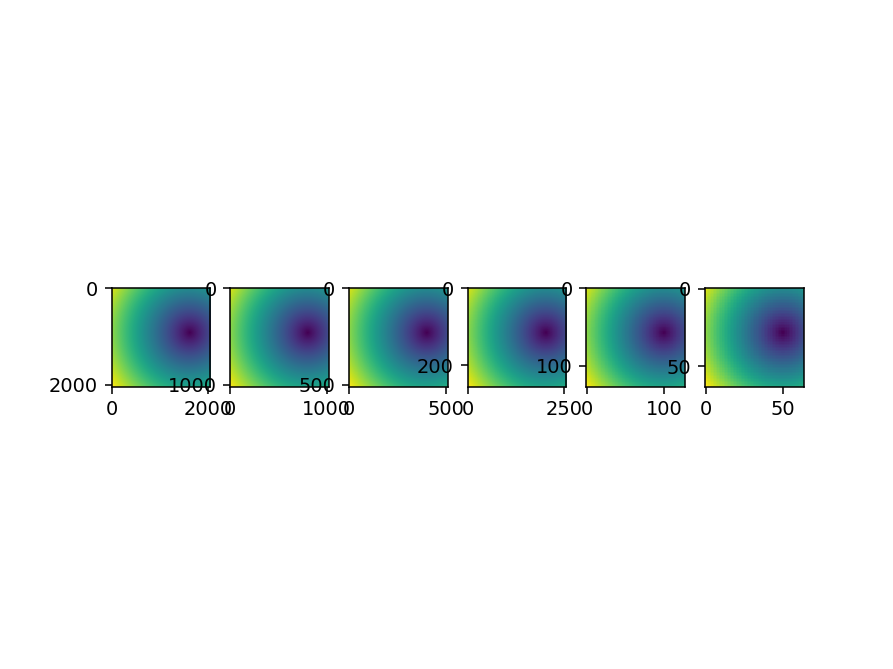

In [16]:
problem = benchmark_utils.create_id22_17_problem()

problem_1024 = benchmark_utils.Problem(
                    image=problem.image[0:1024, problem.image.shape[1] - 1024:],
                    mask=None,
                    values=problem.values,
                    complexity=problem.image.shape[0] * problem.image.shape[1])

problems = [
    # scale_problem(problem_1024, (8192, 8192)),
    # scale_problem(problem_1024, (4096, 4096)),
    problem_1024.scaled((2048, 2048)),
    problem_1024.scaled((1024, 1024)),
    problem_1024.scaled((512, 512)),
    problem_1024.scaled((256, 256)),
    problem_1024.scaled((128, 128)),
    problem_1024.scaled((64, 64)),
]

benchmark_utils.show_problems(problems)

In [17]:
collected_result = []
for problem in problems:
    print("Compute problem: image size = %s, iso contour count = %d" % (problem.image.shape, len(problem.values)))
    for name, factory in algorithms:
        print("- %s" % (name))
        benchmark_utils.collect_computation(collected_result, name, factory, problem)

print(collected_result)

Compute problem: image size = (2048, 2048), iso contour count = 17
- MarchingSquareSciKitImage
- MarchingSquareCythonArrayOpt
- MarchingSquareCythonMap
- MarchingSquareCythonInsertOpt
- MarchingSquareCythonInsertOpenMp
- MarchingSquareCythonInsertOpenMp+MinMax
- MarchingSquareCythonInsertOpenMp98
- MarchingSquareCythonInsertOpenMp98+MinMax
- MarchingSquareCythonInsertOpenMp+MinMax+NoReverse
- MarchingSquareCythonArrayOpenMp
- MarchingSquareCythonArrayOpenMp+MinMax
- MarchingSquareCythonScanInsertOpenMp
- MarchingSquareCythonScanInsertOpenMp+MinMax
Compute problem: image size = (1024, 1024), iso contour count = 17
- MarchingSquareSciKitImage
- MarchingSquareCythonArrayOpt
- MarchingSquareCythonMap
- MarchingSquareCythonInsertOpt
- MarchingSquareCythonInsertOpenMp
- MarchingSquareCythonInsertOpenMp+MinMax
- MarchingSquareCythonInsertOpenMp98
- MarchingSquareCythonInsertOpenMp98+MinMax
- MarchingSquareCythonInsertOpenMp+MinMax+NoReverse
- MarchingSquareCythonArrayOpenMp
- MarchingSquareCy

<IPython.core.display.Javascript object>


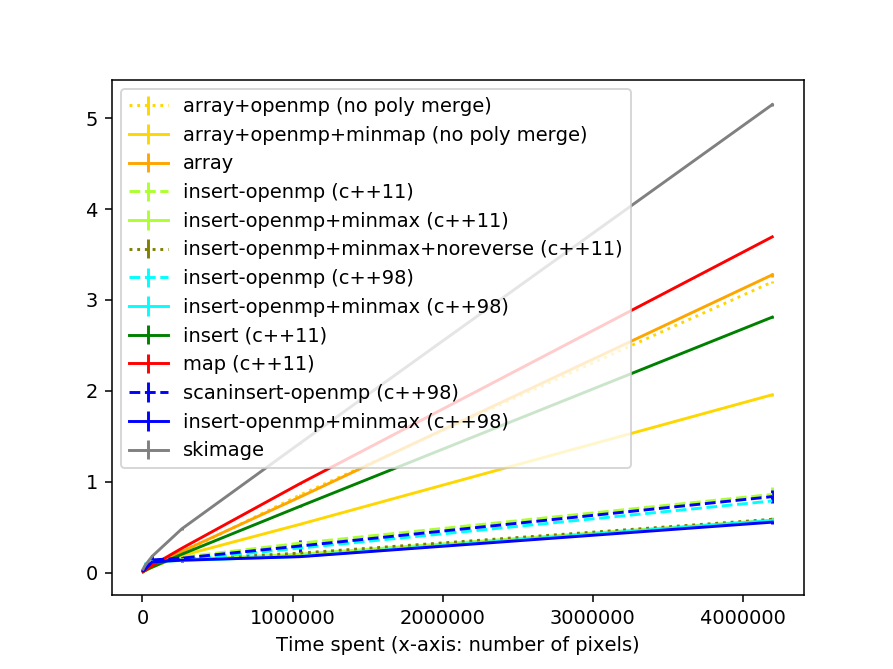

<IPython.core.display.Javascript object>


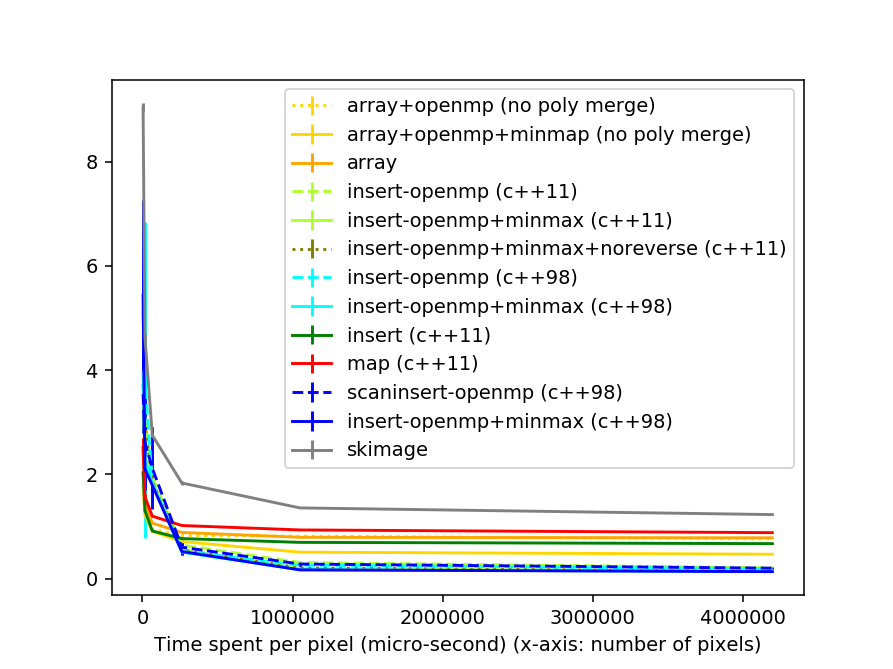

<IPython.core.display.Javascript object>


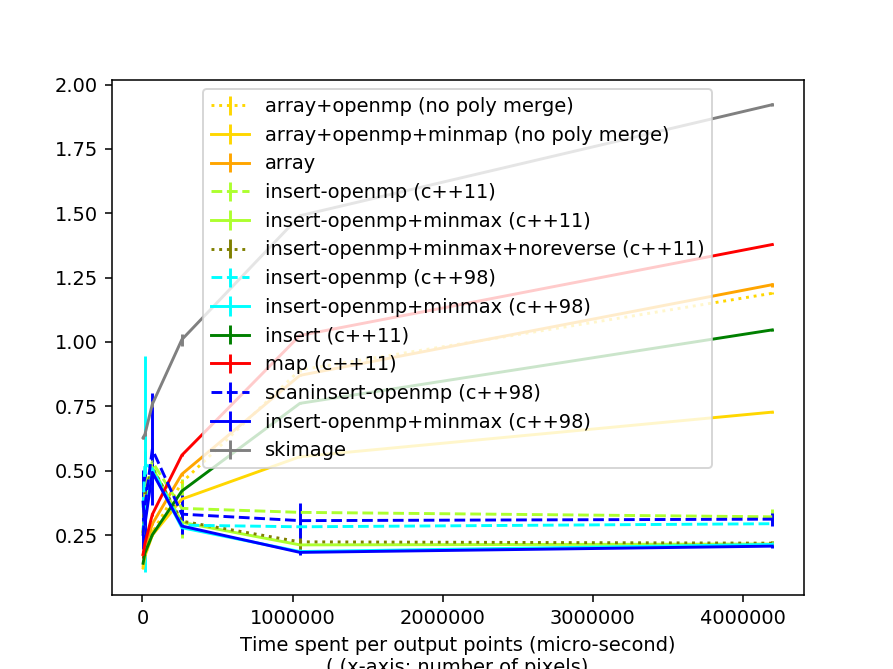

In [18]:
benchmark_utils.plot_computation(collected_result, styles)
benchmark_utils.plot_computation_per_pixels(collected_result, styles)
benchmark_utils.plot_computation_per_points(collected_result, styles)

Benchmark of polygon complexity
===============================

Try to improve the polygon density of the problems

/home/valls/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<IPython.core.display.Javascript object>


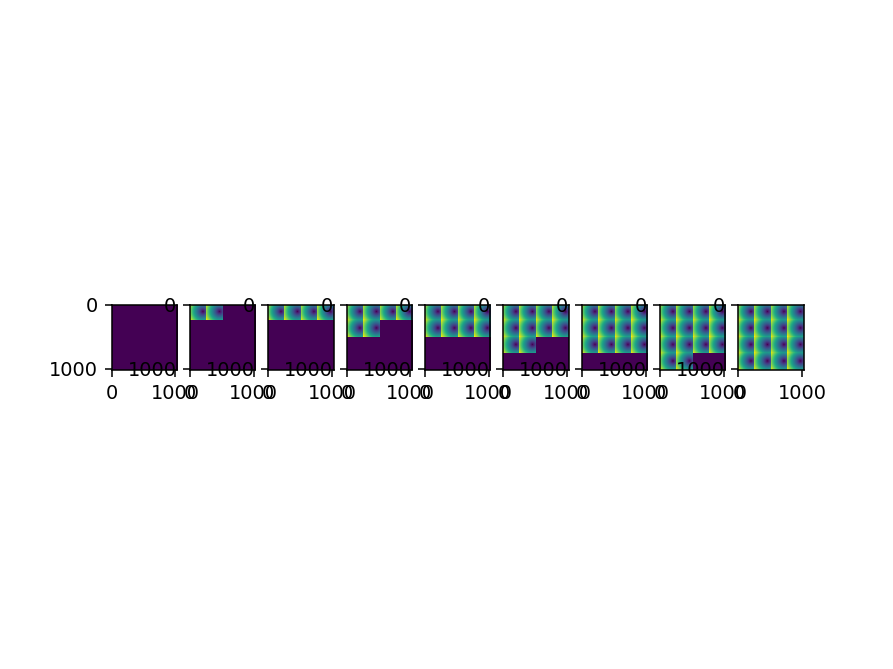

In [19]:
problem = benchmark_utils.create_id22_17_problem()
problem_1024 = benchmark_utils.Problem(image=problem.image[0:1024, problem.image.shape[1] - 1024:],
                       mask=None,
                       values=problem.values,
                       complexity=None)
problem_256 = problem_1024.scaled((256, 256))

problem_size = (1024, 1024)
problems = [
    benchmark_utils.tiled_problem(problem_256, problem_size, 0),
    benchmark_utils.tiled_problem(problem_256, problem_size, 2),
    benchmark_utils.tiled_problem(problem_256, problem_size, 4),
    benchmark_utils.tiled_problem(problem_256, problem_size, 6),
    benchmark_utils.tiled_problem(problem_256, problem_size, 8),
    benchmark_utils.tiled_problem(problem_256, problem_size, 10),
    benchmark_utils.tiled_problem(problem_256, problem_size, 12),
    benchmark_utils.tiled_problem(problem_256, problem_size, 14),
    benchmark_utils.tiled_problem(problem_256, problem_size, 16),
]

benchmark_utils.show_problems(problems)

In [20]:
collected_result = []
for problem in problems:
    print("Compute problem: image size = %s, iso contour count = %d" % (problem.image.shape, len(problem.values)))
    for name, factory in algorithms:
        print("- %s" % (name))
        benchmark_utils.collect_computation(collected_result, name, factory, problem)

print(collected_result)

Compute problem: image size = (1024, 1024), iso contour count = 17
- MarchingSquareSciKitImage
- MarchingSquareCythonArrayOpt
- MarchingSquareCythonMap
- MarchingSquareCythonInsertOpt
- MarchingSquareCythonInsertOpenMp
- MarchingSquareCythonInsertOpenMp+MinMax
- MarchingSquareCythonInsertOpenMp98
- MarchingSquareCythonInsertOpenMp98+MinMax
- MarchingSquareCythonInsertOpenMp+MinMax+NoReverse
- MarchingSquareCythonArrayOpenMp
- MarchingSquareCythonArrayOpenMp+MinMax
- MarchingSquareCythonScanInsertOpenMp
- MarchingSquareCythonScanInsertOpenMp+MinMax
Compute problem: image size = (1024, 1024), iso contour count = 17
- MarchingSquareSciKitImage
- MarchingSquareCythonArrayOpt
- MarchingSquareCythonMap
- MarchingSquareCythonInsertOpt
- MarchingSquareCythonInsertOpenMp
- MarchingSquareCythonInsertOpenMp+MinMax
- MarchingSquareCythonInsertOpenMp98
- MarchingSquareCythonInsertOpenMp98+MinMax
- MarchingSquareCythonInsertOpenMp+MinMax+NoReverse
- MarchingSquareCythonArrayOpenMp
- MarchingSquareCy

<IPython.core.display.Javascript object>


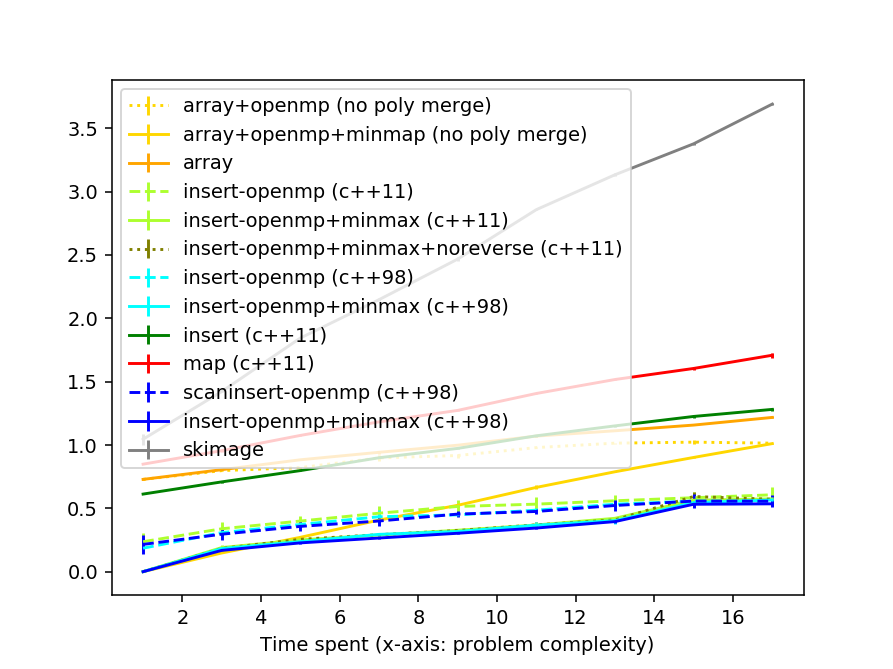

<IPython.core.display.Javascript object>


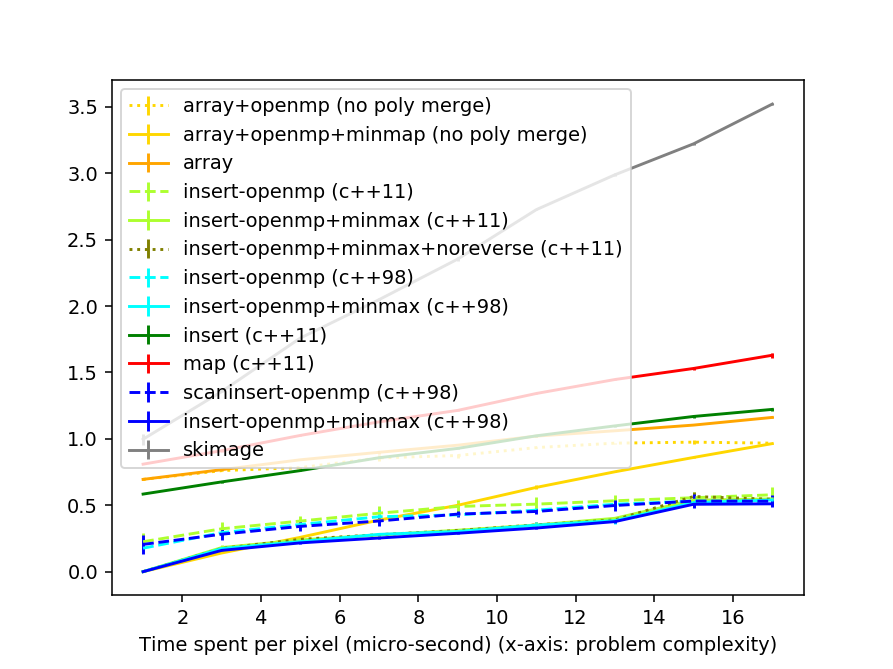

<IPython.core.display.Javascript object>


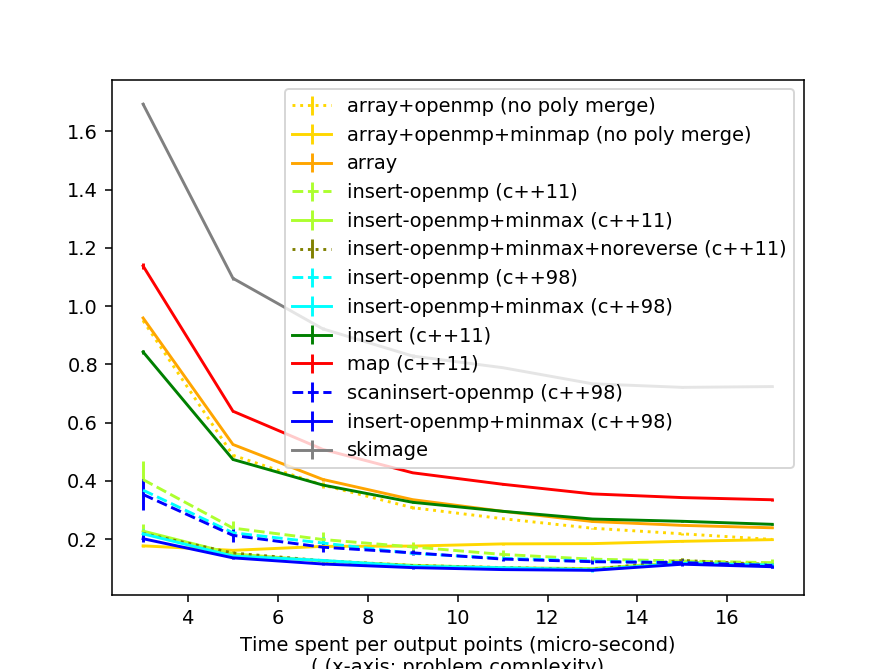

/workspace/valls/esrf_py_tests/iso_contour/benchmark_utils.py:278: RuntimeWarning: divide by zero encountered in true_divide
  compute_y = numpy.array([r.compute_t for r in result]) / nb_points * 1000000
/workspace/valls/esrf_py_tests/iso_contour/benchmark_utils.py:279: RuntimeWarning: divide by zero encountered in true_divide
  compute_error = numpy.array([r.compute_dt for r in result]) / nb_points * 1000000
/home/valls/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:3235: RuntimeWarning: invalid value encountered in double_scalars
  low = [thisx - thiserr for (thisx, thiserr)


In [21]:
benchmark_utils.plot_computation(collected_result, styles, by_complexity=True)
benchmark_utils.plot_computation_per_pixels(collected_result, styles, by_complexity=True)
benchmark_utils.plot_computation_per_points(collected_result, styles, by_complexity=True)

Benchmark pathological problem
==============================

Create a problem with a pattern with require to gererate a polygon point for each pixels of the image.

This should penelize algorithms which preprocess the image and read it again to create polygons.

<IPython.core.display.Javascript object>


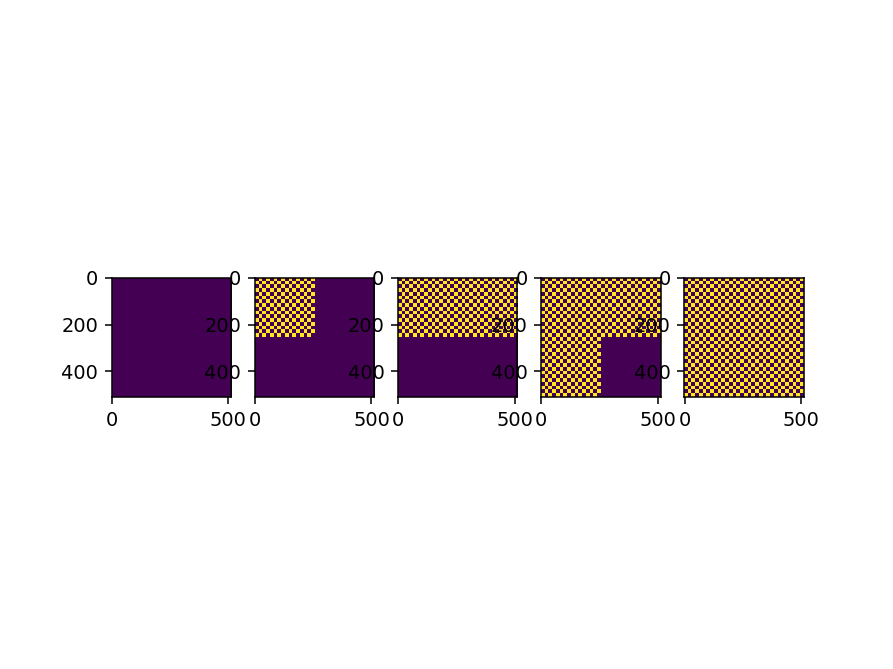

In [22]:
import numpy
image = numpy.zeros((256, 256), dtype=int)
image[1::2,::2] = 1
image[::2,1::2] = 1

problem_256 = benchmark_utils.Problem(image=image,
                                      mask=None,
                                      values=[0.5],
                                      complexity=None)

problem_size = (512, 512)
problems = [
    benchmark_utils.tiled_problem(problem_256, problem_size, 0),
    benchmark_utils.tiled_problem(problem_256, problem_size, 1),
    benchmark_utils.tiled_problem(problem_256, problem_size, 2),
    benchmark_utils.tiled_problem(problem_256, problem_size, 3),
    benchmark_utils.tiled_problem(problem_256, problem_size, 4),
]

benchmark_utils.show_problems(problems)

In [23]:
collected_result = []
for problem in problems:
    print("Compute problem: image size = %s, iso contour count = %d" % (problem.image.shape, len(problem.values)))
    for name, factory in algorithms:
        print("- %s" % (name))
        benchmark_utils.collect_computation(collected_result, name, factory, problem)

print(collected_result)

Compute problem: image size = (512, 512), iso contour count = 1
- MarchingSquareSciKitImage
- MarchingSquareCythonArrayOpt
- MarchingSquareCythonMap
- MarchingSquareCythonInsertOpt
- MarchingSquareCythonInsertOpenMp
- MarchingSquareCythonInsertOpenMp+MinMax
- MarchingSquareCythonInsertOpenMp98
- MarchingSquareCythonInsertOpenMp98+MinMax
- MarchingSquareCythonInsertOpenMp+MinMax+NoReverse
- MarchingSquareCythonArrayOpenMp
- MarchingSquareCythonArrayOpenMp+MinMax
- MarchingSquareCythonScanInsertOpenMp
- MarchingSquareCythonScanInsertOpenMp+MinMax
Compute problem: image size = (512, 512), iso contour count = 1
- MarchingSquareSciKitImage
- MarchingSquareCythonArrayOpt
- MarchingSquareCythonMap
- MarchingSquareCythonInsertOpt
- MarchingSquareCythonInsertOpenMp
- MarchingSquareCythonInsertOpenMp+MinMax
- MarchingSquareCythonInsertOpenMp98
- MarchingSquareCythonInsertOpenMp98+MinMax
- MarchingSquareCythonInsertOpenMp+MinMax+NoReverse
- MarchingSquareCythonArrayOpenMp
- MarchingSquareCythonAr

<IPython.core.display.Javascript object>


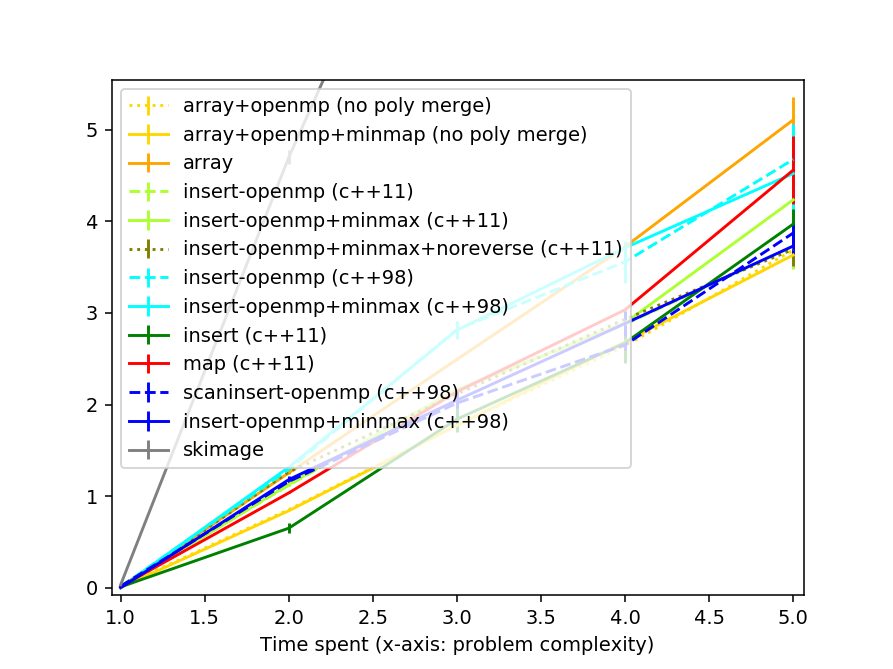

<IPython.core.display.Javascript object>


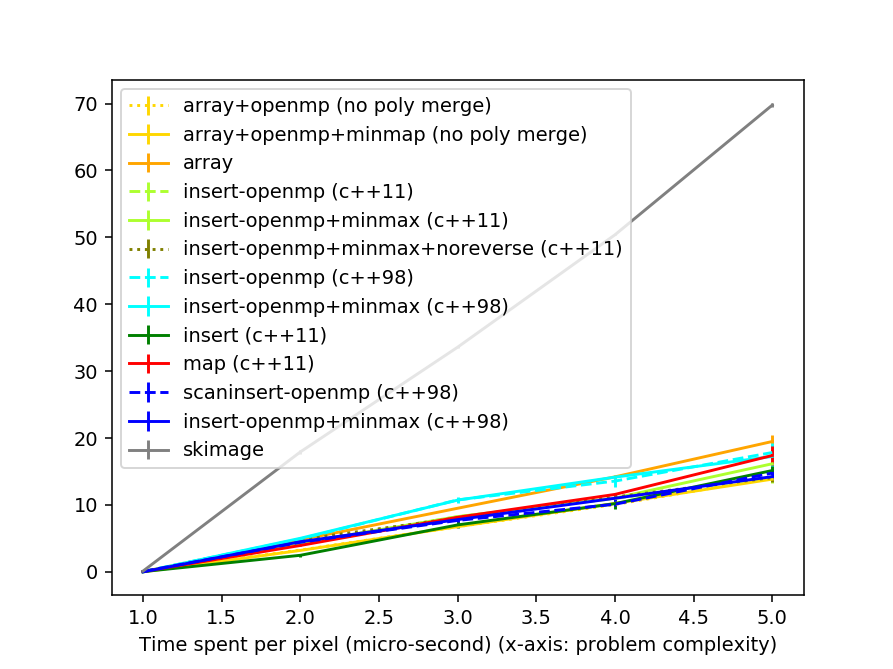

<IPython.core.display.Javascript object>


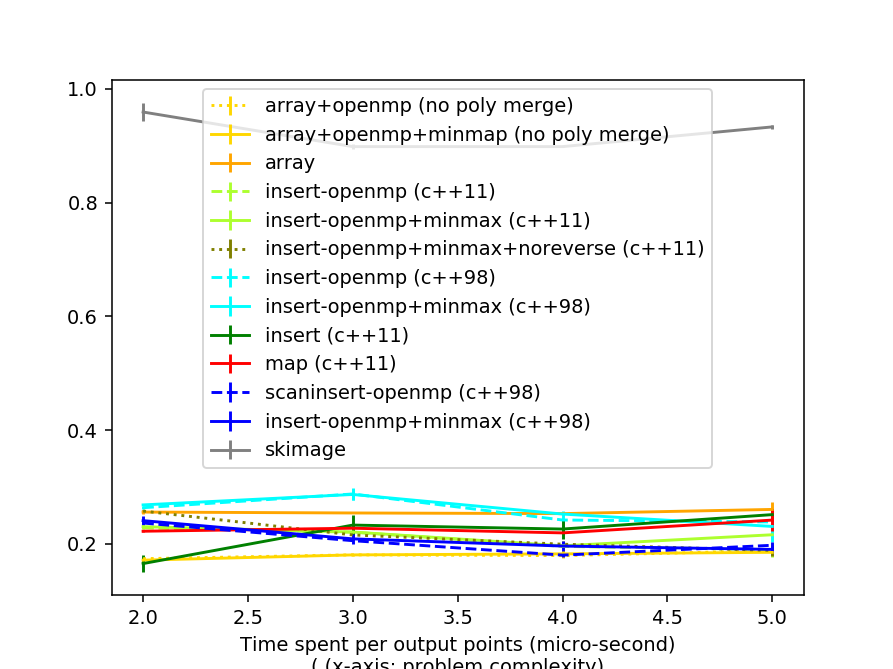

/workspace/valls/esrf_py_tests/iso_contour/benchmark_utils.py:278: RuntimeWarning: divide by zero encountered in true_divide
  compute_y = numpy.array([r.compute_t for r in result]) / nb_points * 1000000
/workspace/valls/esrf_py_tests/iso_contour/benchmark_utils.py:279: RuntimeWarning: divide by zero encountered in true_divide
  compute_error = numpy.array([r.compute_dt for r in result]) / nb_points * 1000000
/home/valls/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:3235: RuntimeWarning: invalid value encountered in double_scalars
  low = [thisx - thiserr for (thisx, thiserr)


In [24]:
benchmark_utils.plot_computation(collected_result, styles, by_complexity=True)
benchmark_utils.plot_computation_per_pixels(collected_result, styles, by_complexity=True)
benchmark_utils.plot_computation_per_points(collected_result, styles, by_complexity=True)

Influence of the size of the polygons
=====================================

Some algorithms uses a lot of reverse, which can create overhead with data containing a very long polygons.

We can try to generate different images containg the same amount of points, but with a different amout of polygones.

<IPython.core.display.Javascript object>


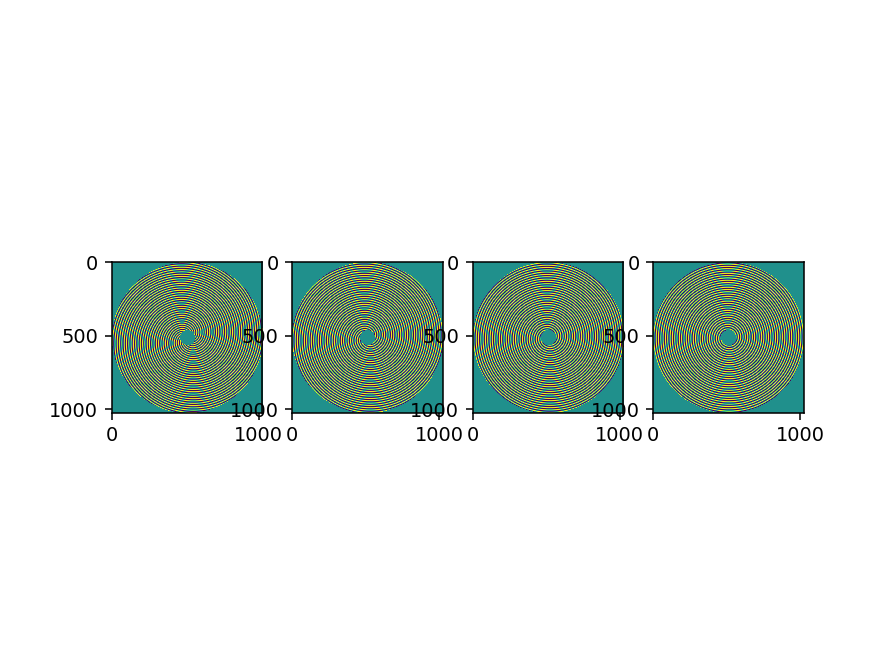

In [25]:
def create_spiral(size, nb=1, freq=100):
    half = size // 2
    y, x = numpy.ogrid[-half:half, -half:half]
    coef = 1 / half
    y, x = y * coef, x * coef + 0.0001
    distance = numpy.sqrt(x*x + y*y)
    angle = numpy.arctan(y/x)
    #data = x*x*(x*2) + y*y/2**numpy.sin(y*5)
    data = numpy.sin(angle * nb * 2 + distance * freq * half / 100, dtype=numpy.float32)
    data[distance < (size/20)*coef] = 0
    data[distance > half * coef] = 0
    return data

problem_size = 1024

spiral_1 = create_spiral(problem_size, 1, 40)
spiral_2 = create_spiral(problem_size, 2, 40)
spiral_3 = create_spiral(problem_size, 4, 40)
spiral_4 = create_spiral(problem_size, 8, 40)

problems = [
    benchmark_utils.Problem(spiral_4, values=[spiral_4.mean()], complexity=1),
    benchmark_utils.Problem(spiral_3, values=[spiral_3.mean()], complexity=2),
    benchmark_utils.Problem(spiral_2, values=[spiral_2.mean()], complexity=3),
    benchmark_utils.Problem(spiral_1, values=[spiral_1.mean()], complexity=4),
]

benchmark_utils.show_problems(problems)

In [26]:
collected_result = []
for problem in problems:
    print("Compute problem: image size = %s, iso contour count = %d" % (problem.image.shape, len(problem.values)))
    for name, factory in algorithms:
        print("- %s" % (name))
        benchmark_utils.collect_computation(collected_result, name, factory, problem)

print(collected_result)

Compute problem: image size = (1024, 1024), iso contour count = 1
- MarchingSquareSciKitImage
- MarchingSquareCythonArrayOpt
- MarchingSquareCythonMap
- MarchingSquareCythonInsertOpt
- MarchingSquareCythonInsertOpenMp
- MarchingSquareCythonInsertOpenMp+MinMax
- MarchingSquareCythonInsertOpenMp98
- MarchingSquareCythonInsertOpenMp98+MinMax
- MarchingSquareCythonInsertOpenMp+MinMax+NoReverse
- MarchingSquareCythonArrayOpenMp
- MarchingSquareCythonArrayOpenMp+MinMax
- MarchingSquareCythonScanInsertOpenMp
- MarchingSquareCythonScanInsertOpenMp+MinMax
Compute problem: image size = (1024, 1024), iso contour count = 1
- MarchingSquareSciKitImage
- MarchingSquareCythonArrayOpt
- MarchingSquareCythonMap
- MarchingSquareCythonInsertOpt
- MarchingSquareCythonInsertOpenMp
- MarchingSquareCythonInsertOpenMp+MinMax
- MarchingSquareCythonInsertOpenMp98
- MarchingSquareCythonInsertOpenMp98+MinMax
- MarchingSquareCythonInsertOpenMp+MinMax+NoReverse
- MarchingSquareCythonArrayOpenMp
- MarchingSquareCyth

<IPython.core.display.Javascript object>


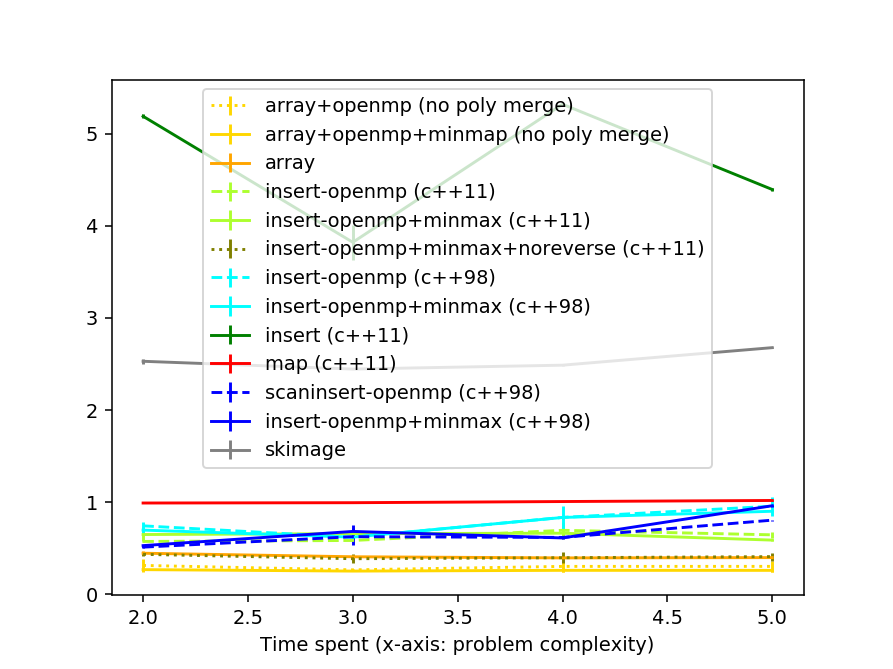

<IPython.core.display.Javascript object>


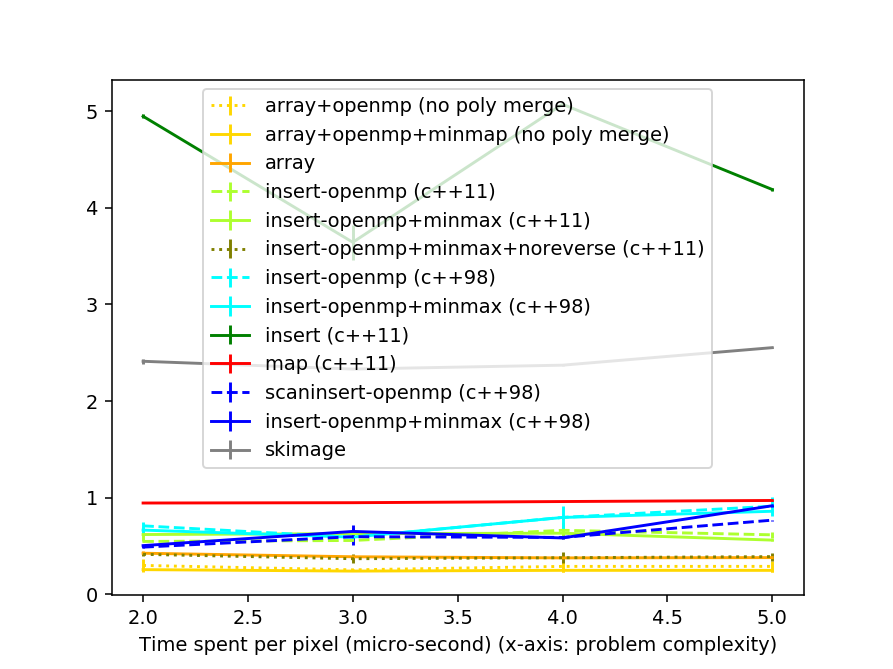

<IPython.core.display.Javascript object>


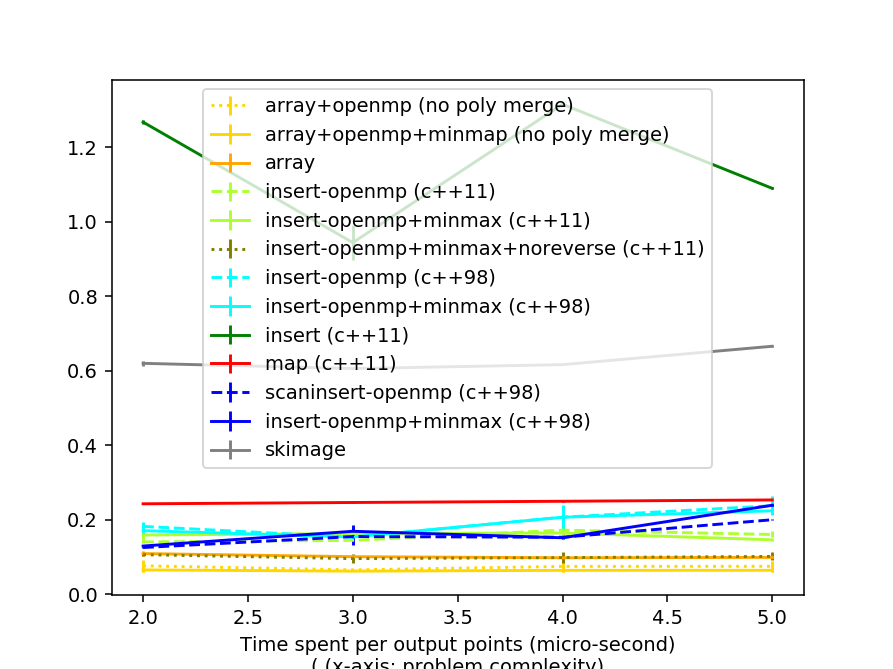

In [27]:
benchmark_utils.plot_computation(collected_result, styles, by_complexity=True)
benchmark_utils.plot_computation_per_pixels(collected_result, styles, by_complexity=True)
benchmark_utils.plot_computation_per_points(collected_result, styles, by_complexity=True)

Impluence of the polygon cache
==============================

Implementations of algorithms using binary or hash maps do not clean up the cache for polygons stopped by a mask. This can create an overhead.

This benchmark try to check this influence.

<IPython.core.display.Javascript object>


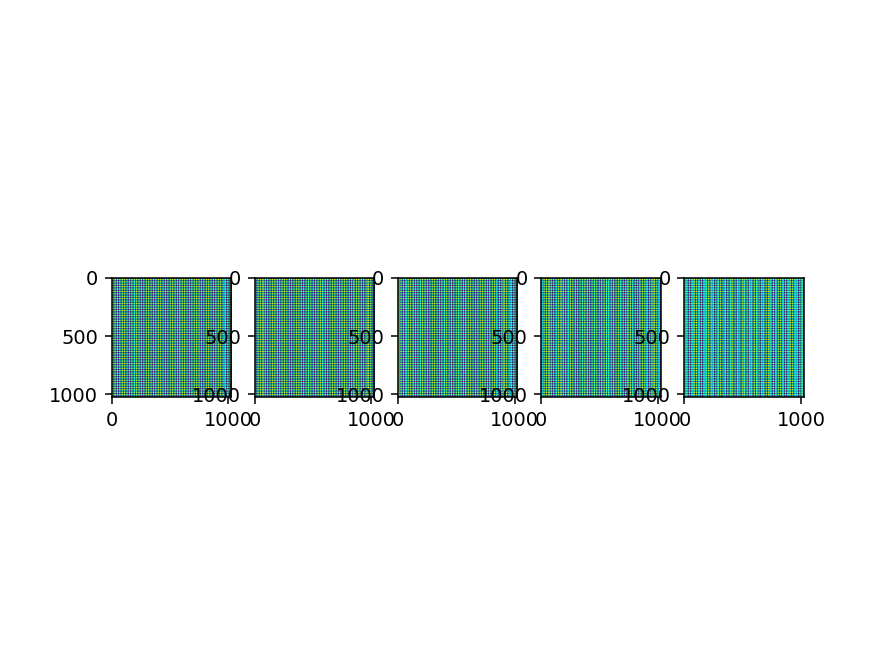

In [28]:
def create_circles(size, freq=100):
    half = size // 2
    y, x = numpy.ogrid[-half:half, -half:half]
    coef = 1 / half
    y, x = y * coef, x * coef
    data = numpy.sin(x * numpy.pi * freq) + numpy.cos(y * numpy.pi * freq)
    data = numpy.array(data, dtype=numpy.float32)
    return data

circles = create_circles(1024, 50)

mask_grid1 = numpy.zeros((1024, 1024), dtype=numpy.int8)
mask_grid1[:,::3] = 1
mask_grid2 = numpy.zeros((1024, 1024), dtype=numpy.int8)
mask_grid2[:,::6] = 1
mask_grid3 = numpy.zeros((1024, 1024), dtype=numpy.int8)
mask_grid3[:,::12] = 1
mask_grid4 = numpy.zeros((1024, 1024), dtype=numpy.int8)
mask_grid4[:,::24] = 1
mask_grid5 = numpy.zeros((1024, 1024), dtype=numpy.int8)
mask_grid5[:,::48] = 1

problems = [
    benchmark_utils.Problem(circles, mask_grid5, [spiral_4.mean()], complexity=1),
    benchmark_utils.Problem(circles, mask_grid4, [spiral_4.mean()], complexity=2),
    benchmark_utils.Problem(circles, mask_grid3, [spiral_3.mean()], complexity=3),
    benchmark_utils.Problem(circles, mask_grid2, [spiral_2.mean()], complexity=4),
    benchmark_utils.Problem(circles, mask_grid1, [spiral_1.mean()], complexity=5),
]

benchmark_utils.show_problems(problems)

In [29]:
collected_result = []
for problem in problems:
    print("Compute problem: image size = %s, iso contour count = %d" % (problem.image.shape, len(problem.values)))
    for name, factory in algorithms:
        print("- %s" % (name))
        benchmark_utils.collect_computation(collected_result, name, factory, problem)

print(collected_result)

Compute problem: image size = (1024, 1024), iso contour count = 1
- MarchingSquareSciKitImage
- MarchingSquareCythonArrayOpt
- MarchingSquareCythonMap
- MarchingSquareCythonInsertOpt
- MarchingSquareCythonInsertOpenMp
- MarchingSquareCythonInsertOpenMp+MinMax
- MarchingSquareCythonInsertOpenMp98
- MarchingSquareCythonInsertOpenMp98+MinMax
- MarchingSquareCythonInsertOpenMp+MinMax+NoReverse
- MarchingSquareCythonArrayOpenMp
- MarchingSquareCythonArrayOpenMp+MinMax
- MarchingSquareCythonScanInsertOpenMp
- MarchingSquareCythonScanInsertOpenMp+MinMax
Compute problem: image size = (1024, 1024), iso contour count = 1
- MarchingSquareSciKitImage
- MarchingSquareCythonArrayOpt
- MarchingSquareCythonMap
- MarchingSquareCythonInsertOpt
- MarchingSquareCythonInsertOpenMp
- MarchingSquareCythonInsertOpenMp+MinMax
- MarchingSquareCythonInsertOpenMp98
- MarchingSquareCythonInsertOpenMp98+MinMax
- MarchingSquareCythonInsertOpenMp+MinMax+NoReverse
- MarchingSquareCythonArrayOpenMp
- MarchingSquareCyth

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from

Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179
Bucket count changed from 

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from

Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179


Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179

Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from 1031 to 2179
Bucket count changed from

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703Bucket count changed from 

Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703

Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703

Bucket count changed from 

Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from

Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from

- MarchingSquareCythonInsertOpenMp98
- MarchingSquareCythonInsertOpenMp98+MinMax
- MarchingSquareCythonInsertOpenMp+MinMax+NoReverse
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket co

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from

Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from 1031 to 4703
Bucket count changed from

<IPython.core.display.Javascript object>


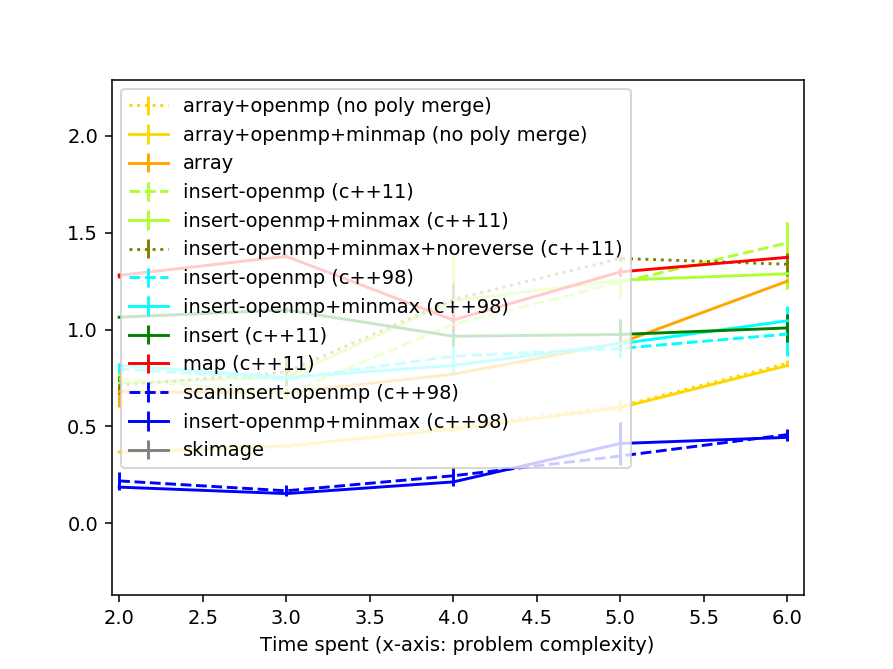

<IPython.core.display.Javascript object>


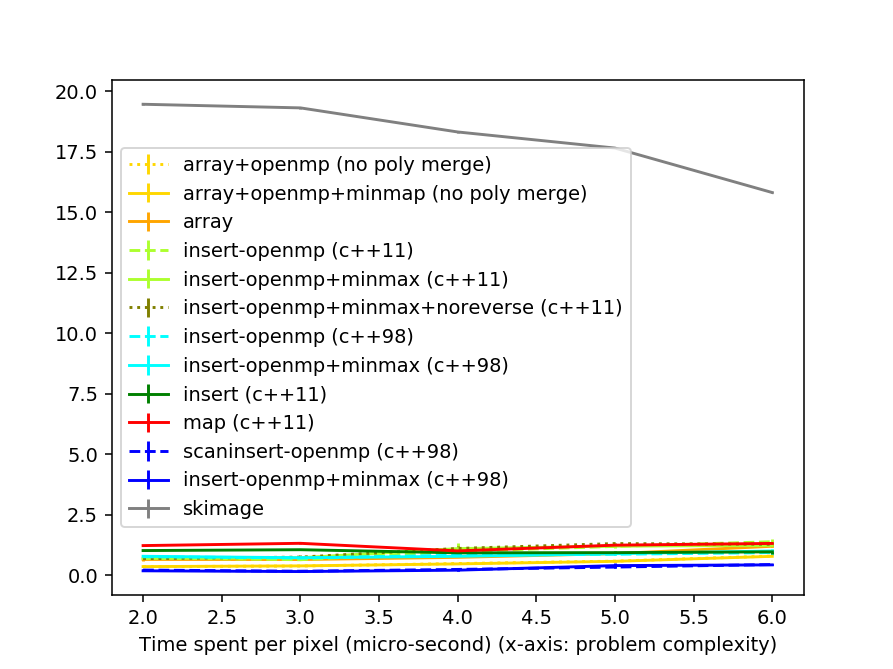

<IPython.core.display.Javascript object>


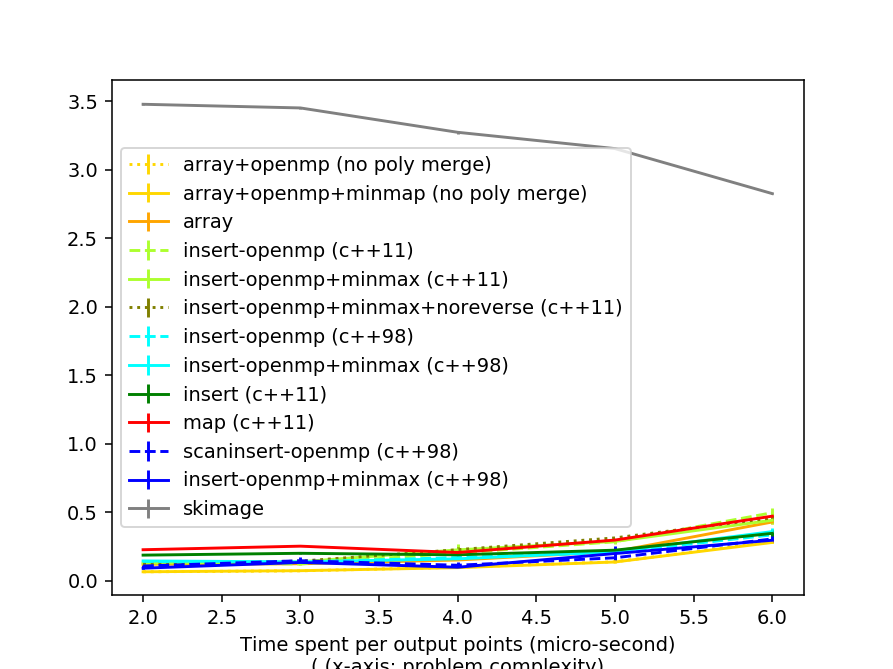

In [30]:
benchmark_utils.plot_computation(collected_result, styles, by_complexity=True)
benchmark_utils.plot_computation_per_pixels(collected_result, styles, by_complexity=True)
benchmark_utils.plot_computation_per_points(collected_result, styles, by_complexity=True)